
# Problem Statement

**Build a model using publicly available data for key *national* demand & supply factors that could influence US home prices. Use that to explain how these factors impacted home prices over the last ~20 years. You can use the S&P Case-Schiller
Home Price Index as a proxy for home prices:fred.stlouisfed.org/series/CSUSHPISA.


**Initially we import all the necessary library files 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**All the data with various factors,ie. National, Supply and Demand factors have been extracted from the publically available sources.

**The data is then taken and checked for missing data.Only the data of the past 20 years has been extracted.

In [ ]:
housing_index_df = pd.read_csv('./housing_price_index.csv')

In [3]:
housing_index_df.head()

,DATE,CSUSHPINSA
0,2000-01-01,100.000
1,2000-02-01,100.571
2,2000-03-01,101.466
3,2000-04-01,102.540
4,2000-05-01,103.701


**Renaming the columns so that they are more readable and understandable.

In [4]:
housing_index_df.rename(columns={'CSUSHPINSA' : 'Price'},inplace=True)

In [5]:
housing_index_df.shape

(270, 2)

In [6]:
housing_index_df.isnull().sum()

DATE     0
Price    0
dtype: int64

<AxesSubplot:xlabel='Price'>

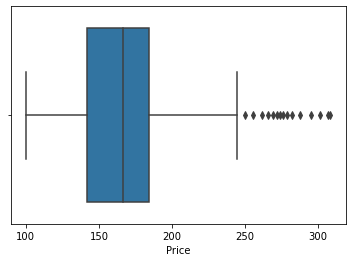

In [7]:
sns.boxplot(x=housing_index_df['Price'])

In [9]:
## housing_index_df = pd.
housing_index_df=housing_index_df.groupby(pd.DatetimeIndex(housing_index_df['DATE']).year).mean()
housing_index_df.head()

,Price
DATE,
2000,104.776667
2001,113.184750
2002,122.287500
2003,133.741167
2004,150.464083


In [10]:
housing_index_df.tail()

,Price
DATE,
2018,202.482667
2019,209.479917
2020,222.147750
2021,260.101500
2022,296.677000


**GDP is one of the national factors that affect the housing prices in US.

In [11]:
## National factors
gdp_national_df = pd.read_csv('./gdp.csv')

In [12]:
gdp_national_df.head()

,DATE,USALORSGPNOSTSAM
0,2000-01-01,101.491684
1,2000-02-01,101.552742
2,2000-03-01,101.627216
3,2000-04-01,101.698483
4,2000-05-01,101.740524


In [13]:
gdp_national_df.rename(columns={'USALORSGPNOSTSAM' : 'GDP Index'},inplace=True)

In [14]:
gdp_national_df.head()
gdp_national_df.isnull().sum()

DATE         0
GDP Index    0
dtype: int64

<AxesSubplot:xlabel='GDP Index'>

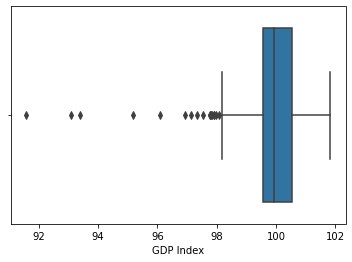

In [15]:
sns.boxplot(x=gdp_national_df['GDP Index'])

In [17]:
gdp_national_df=gdp_national_df.groupby(pd.DatetimeIndex(gdp_national_df['DATE']).year).mean()
gdp_national_df.head()

,GDP Index
DATE,
2000,101.509834
2001,99.881019
2002,98.888812
2003,98.918573
2004,99.844796


**Unemployement rate has been considered as another national factor and is also considered for analysis.

In [18]:
## unemployement rate of US

unemployement_national_df = pd.read_csv('./unemployement.csv')

unemployement_national_df.head()

,DATE,UNRATE
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0


In [19]:
unemployement_national_df.isnull().sum()
unemployement_national_df=unemployement_national_df.groupby(pd.DatetimeIndex(unemployement_national_df['DATE']).year).mean()
unemployement_national_df.head()

,UNRATE
DATE,
2000,3.966667
2001,4.741667
2002,5.783333
2003,5.991667
2004,5.541667


**Next we analyse the supply factors. Monthly house supply in the country is a supply factor

In [20]:
## supply factors

monthly_house_supply_national_df=pd.read_csv('./monthly_house_supply.csv')


In [21]:
monthly_house_supply_national_df.head()

,DATE,MSACSR
0,2000-01-01,4.3
1,2000-02-01,4.3
2,2000-03-01,4.3
3,2000-04-01,4.4
4,2000-05-01,4.4


In [22]:
monthly_house_supply_national_df.isnull().sum()

DATE      0
MSACSR    0
dtype: int64

In [23]:
monthly_house_supply_national_df.rename(columns={'MSACSR' : 'Monthly Supply Index'},inplace=True)

In [24]:
monthly_house_supply_national_df=monthly_house_supply_national_df.groupby(pd.DatetimeIndex(monthly_house_supply_national_df['DATE']).year).mean()
monthly_house_supply_national_df.head()

,Monthly Supply Index
DATE,
2000,4.233333
2001,4.050000
2002,4.075000
2003,3.908333
2004,4.000000


**Demand factors are next taken into consideration. The first demand factor is the mortgage rate

In [25]:
## Demand factors

mortgage_rate_demand_df = pd.read_csv('./mortgage_rate.csv')


In [26]:
mortgage_rate_demand_df.head()

,DATE,MORTGAGE30US
0,2000-01-01,8.2100
1,2000-02-01,8.3250
2,2000-03-01,8.2400
3,2000-04-01,8.1525
4,2000-05-01,8.5150


In [27]:
mortgage_rate_demand_df.rename(columns={'MORTGAGE30US' : 'Mortgage Index'},inplace=True)

In [28]:
mortgage_rate_demand_df=mortgage_rate_demand_df.groupby(pd.DatetimeIndex(mortgage_rate_demand_df['DATE']).year).mean()
mortgage_rate_demand_df.head()

,Mortgage Index
DATE,
2000,8.061625
2001,6.971042
2002,6.536708
2003,5.819542
2004,5.838500


**Next demand factor is Personal Savings

In [29]:
personal_savings_demand_df = pd.read_csv('./personal_savings.csv')

In [30]:
personal_savings_demand_df.head()

,DATE,PMSAVE
0,2000-01-01,358.9
1,2000-02-01,324.3
2,2000-03-01,311.8
3,2000-04-01,347.8
4,2000-05-01,351.1


In [31]:
personal_savings_demand_df.rename(columns={'PMSAVE' : 'Personal Savings Index'},inplace=True)

In [32]:
personal_savings_demand_df=personal_savings_demand_df.groupby(pd.DatetimeIndex(personal_savings_demand_df['DATE']).year).mean()
personal_savings_demand_df.head()

,Personal Savings Index
DATE,
2000,351.433333
2001,382.825000
2002,462.483333
2003,456.666667
2004,445.433333


**Next Demand Factor is Personal Expenditure.

In [33]:
personal_expenditure_demand_df = pd.read_csv('./personal_expenditure.csv')

In [34]:
personal_expenditure_demand_df.rename(columns={'PCE' : 'Personal Expenditure'},inplace=True)
personal_expenditure_demand_df=personal_expenditure_demand_df.groupby(pd.DatetimeIndex(personal_expenditure_demand_df['DATE']).year).mean()
personal_expenditure_demand_df.head()

,Personal Expenditure
DATE,
2000,6767.175000
2001,7073.791667
2002,7348.950000
2003,7740.750000
2004,8231.966667


**Final Demand factor is the Personal Income 

In [35]:
personal_income_demand_df = pd.read_csv('./personal_income.csv')
personal_income_demand_df=personal_income_demand_df.groupby(pd.DatetimeIndex(personal_income_demand_df['DATE']).year).mean()
personal_income_demand_df.head()

,DSPIC96
DATE,
2000,9501.216667
2001,9759.233333
2002,10047.833333
2003,10309.758333
2004,10652.741667


In [36]:
personal_income_demand_df.rename(columns={'DSPIC96' : 'Personal Income'},inplace=True)

In [37]:
personal_income_demand_df.head()

,Personal Income
DATE,
2000,9501.216667
2001,9759.233333
2002,10047.833333
2003,10309.758333
2004,10652.741667


**Now that all the necessary data has been extracted,we combine all the factors to form a single dataframe based on the year.

In [38]:
## Joining all the the dataframes to get the feature table

US_pricing_df = pd.concat([housing_index_df,gdp_national_df,unemployement_national_df,monthly_house_supply_national_df,mortgage_rate_demand_df,personal_savings_demand_df,personal_expenditure_demand_df,personal_income_demand_df], axis=1, join="inner")

In [39]:
US_pricing_df

,Price,GDP Index,UNRATE,Monthly Supply Index,Mortgage Index,Personal Savings Index,Personal Expenditure,Personal Income
DATE,,,,,,,,
2000,104.776667,101.509834,3.966667,4.233333,8.061625,351.433333,6767.175000,9501.216667
2001,113.184750,99.881019,4.741667,4.050000,6.971042,382.825000,7073.791667,9759.233333
2002,122.287500,98.888812,5.783333,4.075000,6.536708,462.483333,7348.950000,10047.833333
2003,133.741167,98.918573,5.991667,3.908333,5.819542,456.666667,7740.750000,10309.758333
2004,150.464083,99.844796,5.541667,4.000000,5.838500,445.433333,8231.966667,10652.741667
2005,171.779167,100.604932,5.083333,4.450000,5.864875,267.983333,8769.058333,10811.366667
2006,183.481667,101.110633,4.608333,6.433333,6.410833,358.650000,9277.250000,11226.591667
2007,179.943583,101.568950,4.616667,8.383333,6.340458,352.666667,9746.591667,11492.833333
2008,164.061917,100.850742,5.800000,10.675000,6.036125,503.358333,10050.091667,11630.125000


**As we can see, it is time series data. We are going to apply Linear Regression on the same. 
**We shall analyse the affect of all the features we have extracted on the Price by using a Correlation Matrix.

<AxesSubplot:>

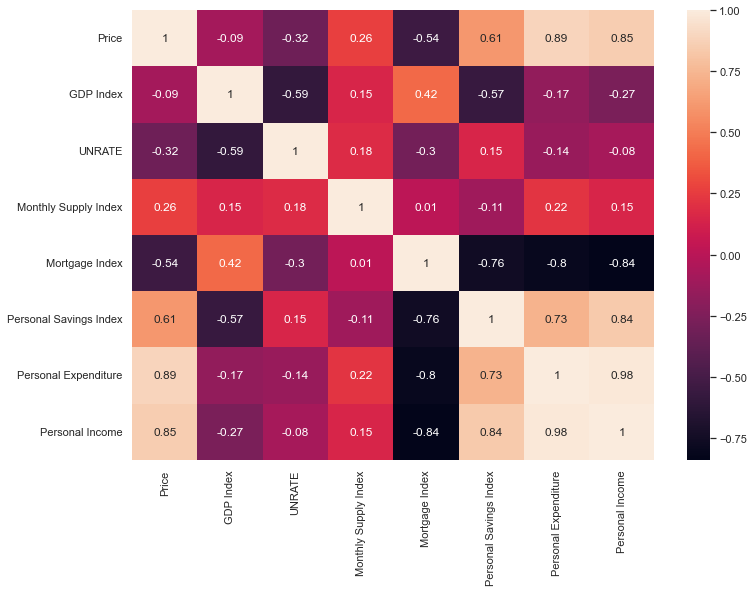

In [41]:
## correlation matrix

correlation_matrix = US_pricing_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

**From the correlation matrix, it is evident that, Personal Expenditure and Personal Income are the 2 factors that are highly correlated with Price,ie. as the Personal Income or Personal Expenditure increases, the housing prices gets affected.

In [42]:
features = US_pricing_df.columns

In [43]:
features

Index(['Price', 'GDP Index', 'UNRATE', 'Monthly Supply Index',
       'Mortgage Index', 'Personal Savings Index', 'Personal Expenditure',
       'Personal Income'],
      dtype='object')

In [44]:
feature_count=len(features)

In [45]:
target = US_pricing_df['Price']

**For further analysis on affect of each feature on price, we can use the scatter plot.

C:\Users\91854\AppData\Local\Temp/ipykernel_9724/1590410190.py:2: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(features)/2 , i+1)


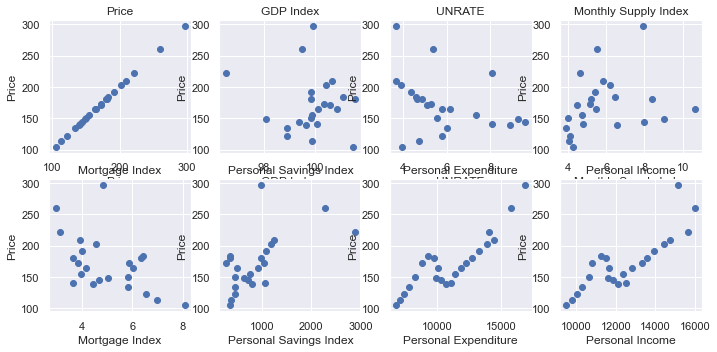

In [72]:
for i, col in enumerate(features):
    plt.subplot(3, len(features)/2 , i+1)
    x = US_pricing_df[col]
    y = target
    plt.scatter(x, y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')

**In order to build our regression model, we first split our data into training and test sets

In [47]:
# Split to train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(US_pricing_df, US_pricing_df['Price'], test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(18, 8)
(5, 8)
(18,)
(5,)


**We then fit the training data into our model.

In [48]:
## Training and testing the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

**We then evaluate the model by checking the value of RMSE and R Squared.

In [49]:
## Model Evaluation
from sklearn.metrics import r2_score

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1.030218904955004e-13
R2 score is 1.0




In [50]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 1.0028474414626402e-13
R2 score is 1.0


**We can see that both the RMSE and R squared values are 1. Hene we have developed a good model.